In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from xgboost import plot_importance, XGBClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from time import time
import seaborn as sns

from tensorflow.keras.layers import (Dense, Activation, Input, Conv2D, MaxPooling2D, Flatten,
                                     GlobalMaxPooling2D, LeakyReLU, concatenate, Dropout)
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [2]:
SEED=42
from numpy.random import seed
from tensorflow import random
seed(SEED)
random.set_seed(SEED)

In [3]:
X = np.load('../project1/X.npy')
Y = np.load('../project1/Y.npy')

In [4]:
Ydf = DataFrame(data=Y, columns=[9,0,7,6,1,8,4,3,2,5])
Ydf = Ydf[[x for x in range(10)]].to_numpy()
#Ydf = Y
#Ydf['class']='C' + (Ydf[range(10)].idxmax(axis=1)).astype('str')
#Ydf[['class']]
#Y2 = Ydf[['class']].to_numpy()

In [5]:
Ydf

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [7]:
X.shape

(2062, 64, 64, 1)

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Ydf, test_size=0.1, random_state=SEED)

In [9]:
def create_model(filters=[8,16,4], weights=[64,32], input_shape=(64,64,1), dropout=0.15):
    model = Sequential()
    model.add(Input(shape=input_shape))
    
    for filter in filters:
        model.add(Conv2D(filter, (3,3), padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dropout(dropout))
     
    for weight in weights:
        model.add(Dense(weight))
        model.add(Activation('relu'))

    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model


In [10]:
loss='categorical_crossentropy'
#LEARNING_RATE = 0.05
BATCH_SIZE = X_train.shape[0]//20 # computing the loss over the whole dataset
EPOCHS = 300
model = create_model()
model.compile(loss=loss, optimizer='nadam', metrics=['acc'],)# metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         80        
_________________________________________________________________
activation (Activation)      (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 4)         5

In [11]:
t0 = time()
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)
print (time()-t0)

Train on 1855 samples, validate on 207 samples
Epoch 1/300
1855/1855 [==============================] - 5s 3ms/sample - loss: 2.2969 - acc: 0.1267 - val_loss: 2.2851 - val_acc: 0.0966
Epoch 2/300
1855/1855 [==============================] - 2s 1ms/sample - loss: 2.2146 - acc: 0.2129 - val_loss: 2.0773 - val_acc: 0.3237
Epoch 3/300
1855/1855 [==============================] - 2s 1ms/sample - loss: 1.8090 - acc: 0.3806 - val_loss: 1.8383 - val_acc: 0.2850
Epoch 4/300
1855/1855 [==============================] - 2s 1ms/sample - loss: 1.3633 - acc: 0.5536 - val_loss: 1.6108 - val_acc: 0.4058
Epoch 5/300
1855/1855 [==============================] - 2s 1ms/sample - loss: 1.1230 - acc: 0.6129 - val_loss: 1.2094 - val_acc: 0.5024
Epoch 6/300
1855/1855 [==============================] - 2s 1ms/sample - loss: 0.9794 - acc: 0.6701 - val_loss: 1.0330 - val_acc: 0.6522
Epoch 7/300
1855/1855 [==============================] - 2s 1ms/sample - loss: 0.9374 - acc: 0.6809 - val_loss: 0.7655 - val_acc: 0

1855/1855 [==============================] - 1s 618us/sample - loss: 0.1739 - acc: 0.9482 - val_loss: 0.3309 - val_acc: 0.8841
Epoch 60/300
1855/1855 [==============================] - 1s 621us/sample - loss: 0.1726 - acc: 0.9450 - val_loss: 0.2939 - val_acc: 0.9034
Epoch 61/300
1855/1855 [==============================] - 1s 621us/sample - loss: 0.1747 - acc: 0.9402 - val_loss: 0.4139 - val_acc: 0.8696
Epoch 62/300
1855/1855 [==============================] - 1s 620us/sample - loss: 0.1830 - acc: 0.9380 - val_loss: 0.4000 - val_acc: 0.8696
Epoch 63/300
1855/1855 [==============================] - 1s 631us/sample - loss: 0.1789 - acc: 0.9423 - val_loss: 0.3391 - val_acc: 0.8696
Epoch 64/300
1855/1855 [==============================] - 1s 619us/sample - loss: 0.1515 - acc: 0.9456 - val_loss: 0.2662 - val_acc: 0.9130
Epoch 65/300
1855/1855 [==============================] - 1s 627us/sample - loss: 0.1606 - acc: 0.9445 - val_loss: 0.2857 - val_acc: 0.8986
Epoch 66/300
1855/1855 [=========

1855/1855 [==============================] - 1s 714us/sample - loss: 0.0692 - acc: 0.9790 - val_loss: 0.2271 - val_acc: 0.9034
Epoch 118/300
1855/1855 [==============================] - 1s 722us/sample - loss: 0.0596 - acc: 0.9806 - val_loss: 0.1816 - val_acc: 0.9227
Epoch 119/300
1855/1855 [==============================] - 1s 704us/sample - loss: 0.0537 - acc: 0.9811 - val_loss: 0.2070 - val_acc: 0.9227
Epoch 120/300
1855/1855 [==============================] - 1s 709us/sample - loss: 0.0494 - acc: 0.9849 - val_loss: 0.3037 - val_acc: 0.8792
Epoch 121/300
1855/1855 [==============================] - 1s 711us/sample - loss: 0.0692 - acc: 0.9774 - val_loss: 0.1906 - val_acc: 0.9420
Epoch 122/300
1855/1855 [==============================] - 1s 711us/sample - loss: 0.0471 - acc: 0.9838 - val_loss: 0.1794 - val_acc: 0.9372
Epoch 123/300
1855/1855 [==============================] - 1s 731us/sample - loss: 0.0458 - acc: 0.9849 - val_loss: 0.1764 - val_acc: 0.9372
Epoch 124/300
1855/1855 [==

1855/1855 [==============================] - 1s 725us/sample - loss: 0.0424 - acc: 0.9844 - val_loss: 0.1777 - val_acc: 0.9275
Epoch 176/300
1855/1855 [==============================] - 1s 717us/sample - loss: 0.0257 - acc: 0.9925 - val_loss: 0.2375 - val_acc: 0.9082
Epoch 177/300
1855/1855 [==============================] - 1s 721us/sample - loss: 0.0363 - acc: 0.9881 - val_loss: 0.1826 - val_acc: 0.9275
Epoch 178/300
1855/1855 [==============================] - 1s 705us/sample - loss: 0.0288 - acc: 0.9919 - val_loss: 0.2884 - val_acc: 0.8841
Epoch 179/300
1855/1855 [==============================] - 1s 718us/sample - loss: 0.0433 - acc: 0.9860 - val_loss: 0.2430 - val_acc: 0.9130
Epoch 180/300
1855/1855 [==============================] - 1s 722us/sample - loss: 0.0328 - acc: 0.9892 - val_loss: 0.1952 - val_acc: 0.9324
Epoch 181/300
1855/1855 [==============================] - 1s 728us/sample - loss: 0.0345 - acc: 0.9881 - val_loss: 0.4846 - val_acc: 0.8937
Epoch 182/300
1855/1855 [==

Epoch 233/300
1855/1855 [==============================] - 1s 714us/sample - loss: 0.0237 - acc: 0.9914 - val_loss: 0.2531 - val_acc: 0.9227
Epoch 234/300
1855/1855 [==============================] - 1s 701us/sample - loss: 0.0168 - acc: 0.9941 - val_loss: 0.1947 - val_acc: 0.9324
Epoch 235/300
1855/1855 [==============================] - 1s 764us/sample - loss: 0.0179 - acc: 0.9925 - val_loss: 0.1935 - val_acc: 0.9372
Epoch 236/300
1855/1855 [==============================] - 1s 743us/sample - loss: 0.0172 - acc: 0.9951 - val_loss: 0.2415 - val_acc: 0.9372
Epoch 237/300
1855/1855 [==============================] - 1s 742us/sample - loss: 0.0149 - acc: 0.9946 - val_loss: 0.2168 - val_acc: 0.9324
Epoch 238/300
1855/1855 [==============================] - 1s 722us/sample - loss: 0.0111 - acc: 0.9962 - val_loss: 0.2221 - val_acc: 0.9324
Epoch 239/300
1855/1855 [==============================] - 1s 728us/sample - loss: 0.0181 - acc: 0.9946 - val_loss: 0.2295 - val_acc: 0.9275
Epoch 240/300

1855/1855 [==============================] - 1s 760us/sample - loss: 0.0169 - acc: 0.9951 - val_loss: 0.1594 - val_acc: 0.9420
Epoch 292/300
1855/1855 [==============================] - 1s 654us/sample - loss: 0.0052 - acc: 0.9995 - val_loss: 0.1677 - val_acc: 0.9420
Epoch 293/300
1855/1855 [==============================] - 1s 635us/sample - loss: 0.0125 - acc: 0.9968 - val_loss: 0.2583 - val_acc: 0.9179
Epoch 294/300
1855/1855 [==============================] - 1s 637us/sample - loss: 0.0158 - acc: 0.9962 - val_loss: 0.1808 - val_acc: 0.9324
Epoch 295/300
1855/1855 [==============================] - 1s 628us/sample - loss: 0.0202 - acc: 0.9914 - val_loss: 0.1667 - val_acc: 0.9420
Epoch 296/300
1855/1855 [==============================] - 1s 626us/sample - loss: 0.0118 - acc: 0.9968 - val_loss: 0.1735 - val_acc: 0.9324
Epoch 297/300
1855/1855 [==============================] - 1s 625us/sample - loss: 0.0067 - acc: 0.9978 - val_loss: 0.2184 - val_acc: 0.9324
Epoch 298/300
1855/1855 [==

In [12]:
def plot_history(history, metrics=['loss'], val=False, shape=None, logy=False):
    if not isinstance(logy, list):
        logy = [logy] * len(metrics)
    df = DataFrame(history.history)
    if shape is None:
        shape = (1,len(metrics))
    for i, metric in enumerate(metrics):
        cols = [metric]
        if val:
            cols.append('val_' + metric)
        ax = plt.subplot(shape[0],shape[1],i+1)
        df[cols].plot(ax=ax, logy=logy[i])
        plt.grid(True)
        plt.xlabel('epoch')
    plt.show()

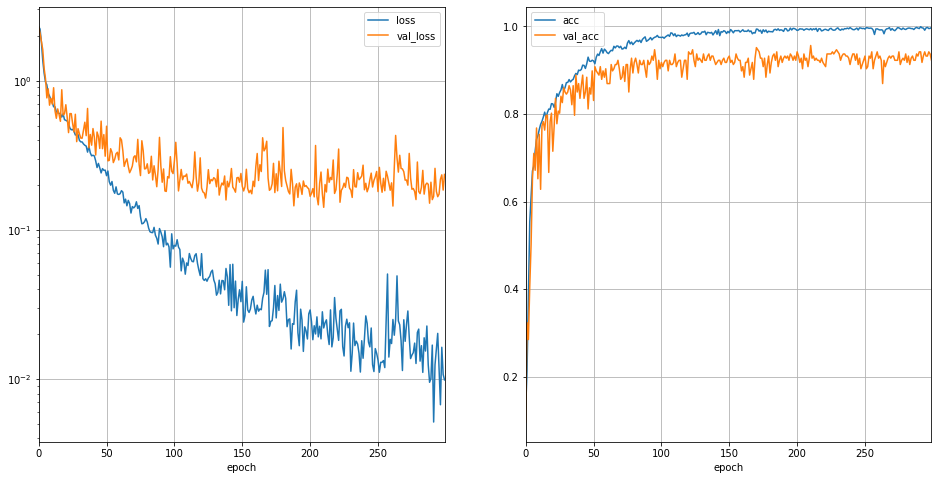

In [13]:
fig = plt.figure(figsize=(16, 8))
plot_history(history, metrics=['loss','acc'], val=True, logy=[True,False])

In [14]:
y_pred = model.predict(X_valid)

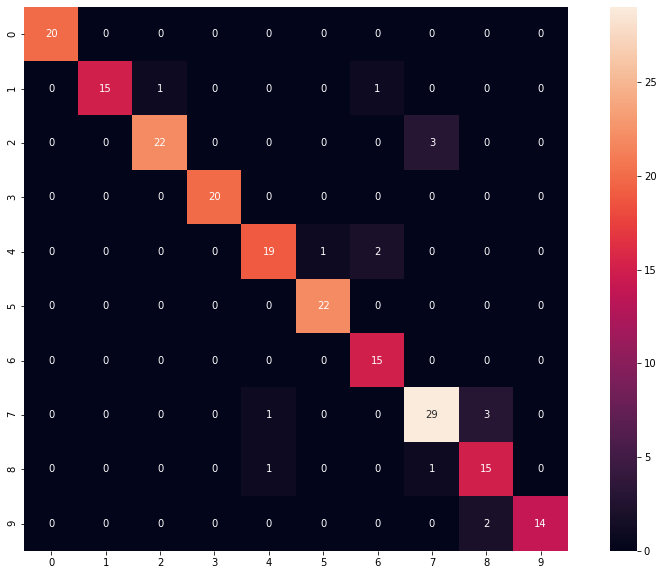

Accuracy= 0.9227053140096618


In [15]:
y_valid_class = y_valid.argmax(axis=1)
y_pred_class = y_pred.argmax(axis=1)
conf_mat = confusion_matrix(y_valid_class, y_pred_class)
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f')
plt.show()
print('Accuracy=', accuracy_score(y_valid_class, y_pred_class))

In [16]:
y_pred[0]

array([1.4103526e-16, 3.1120005e-19, 4.2795035e-15, 3.0157629e-17,
       2.4664705e-03, 2.1785837e-20, 9.9752218e-01, 1.1283486e-05,
       3.9165104e-18, 5.9738225e-14], dtype=float32)